## A Visual representation of Gradient Descent.

This notebook serves the purpose of trying its best to explain and make you understand Gradient descent by watching it work step-by-step. For this, we're gonna use the fastai library, that is built upon PyTorch nad thus we'll be using the most effiecient data structues for deep learning applications: *Tensors*. Tensors allow large computations conataining millions of data efficiently using the parallel computation powres of a GPU.

### End-to-End Gradient Descent

In [1]:
from fastai.vision.all import *
import torch
import matplotlib.pyplot as plt

Fistly, for our purpose, we'll synsthesize a dummy data, store it in a tensor and then visualize as we apply a simple function on it and optimize the parameters.

Here would be a good time to explain and give an overview of how Machine learning actually works in the most simple way.

First, here's a quote by Arthur Samuel, a pioneer in the filed of AI:

> : Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.

Now, allow me to break it down to you in a simple, digestable way. What seperates a ML model from a simple program is the fact that it is not hard-coded for a specific tasks by giving the particular parameters, but instead leanrs to adjust and get the most suitable parameters through learning from many example data. So, in simple terms, ML models are designed to find the most accurate mapping (function) from independent variables to the targets by a means of updating the parameters of a function according to its performance. So how do we do this?

Suppose a simple problem with one independent variable and a target, that, when visualized on the X-Y plane acquires the shape of a parabola. So we know that the function that maps them must be of the form:
*f= (a-squared)*x + (b)*x + c*. 

So now, our job is to simply find the values of a, b, & c (parameters of the function). one way we can do this is hit-n-trials, trying randomly one-by-one and then checking their performance (using a loss function), but that can take up a lot of time. Now this is where **gradient-descent** comes into picture. Instead of the iterative process of hit-n-trial, we can randomly initialize the parameters, calculate loss of the model, and then *step* (change/update) the parameters accordingly so that it gives a lower loss.

In gradient descent, calculus comes into help for telling the directon (sign) of the *step* we need to take in order to decrease our loss.

In [2]:
var = torch.arange(0,20)
var

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])

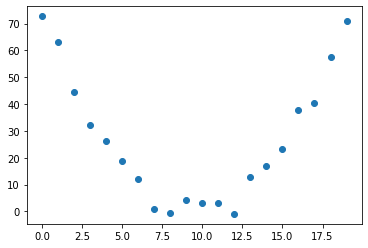

In [3]:
target = torch.randn(20)*3 + 0.75*(var-9.5)**2 + 1
plt.scatter(var,target);

We can see that its a parabolic mapping, so we know it should be of the form `a*(var**2)+(b*var)+c`. So we'll take that as our hypothesis function.

In [4]:
def f(t,params):
    a,b,c = params
    return a*(t**2)+b*(t)+c

Here, we use Mean-squared error (L2 norm) as our measure of performance.

In [5]:
def mse(preds, targets): return ((preds-targets)**2).mean()

#### Step 1: Initialize the parameters

In [6]:
params = torch.randn(3).requires_grad_()

In [7]:
orig_params = params.clone()

#### Step 2: Calculate the predictions

In [8]:
preds = f(var, params)

In [9]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(var, target)
    ax.scatter(var, to_np(preds), color='red')
    ax.set_ylim(-300,100)

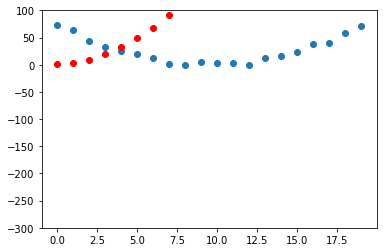

In [10]:
show_preds(preds)

#### Step 3: Calculate the loss

In [11]:
loss = mse(preds, target)
loss

tensor(75534.0703, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the gradients

In [12]:
loss.backward()
params.grad

tensor([91740.9922,  5907.7617,   387.4849])

In [13]:
params.grad * 1e-5

tensor([0.9174, 0.0591, 0.0039])

In [14]:
params

tensor([1.6979, 1.1034, 0.5008], requires_grad=True)

#### Step 5: Step the weights. 

In [15]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [16]:
preds = f(var,params)
mse(preds, target)

tensor(14894.5674, grad_fn=<MeanBackward0>)

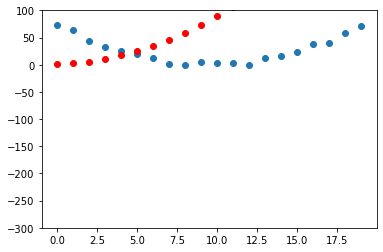

In [17]:
show_preds(preds)

In [18]:
def apply_step(params, prn=True):
    preds = f(var, params)
    loss = mse(preds, target)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

#### Step 6: Repeat the process 

In [19]:
for i in range(10): apply_step(params)

14894.5673828125
3419.71533203125
1248.3172607421875
837.4169921875
759.6568603515625
744.9371337890625
742.1463623046875
741.6130981445312
741.5069580078125
741.4815673828125


In [20]:
params = orig_params.detach().requires_grad_()

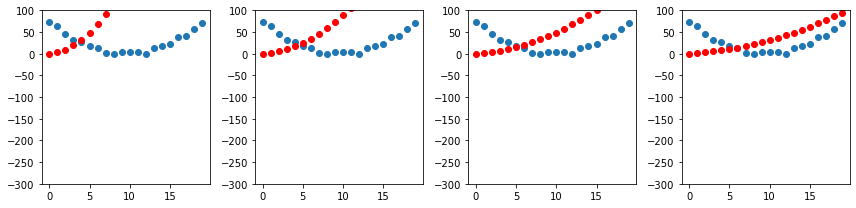

In [21]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

#### Step 7: stop

We decide to stop the iterative according to our desireable accuracy of the model.